**Uploading the ZIP File to Google Colab**

In [ ]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to select a file


Saving Indonesian Food Recipes.zip to Indonesian Food Recipes.zip


**Extracting the Zip File**

In [ ]:
import zipfile
import os

zip_path = "/content/Indonesian Food Recipes.zip"  # Dataset archive pathe
extract_path = "extracted_folder"  # Directory for extracted files

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
os.listdir(extract_path)


['dataset-kambing.csv',
 'dataset-tahu.csv',
 'dataset-udang.csv',
 'dataset-ayam.csv',
 'dataset-telur.csv',
 'dataset-sapi.csv',
 'dataset-tempe.csv',
 'dataset-ikan.csv']

**Loading Files from the Extracted Folder**

In [ ]:
import pandas as pd
import os

extract_path = "extracted_folder"  # Change this if needed

# List all CSV files
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
print("Found CSV files:", csv_files)

# Load each CSV file into a dictionary of DataFrames
dfs = {file: pd.read_csv(os.path.join(extract_path, file)) for file in csv_files}

# Display the first few rows of each dataset
for file, df in dfs.items():
    print(f"\n Preview of {file}:")
    print(df.head())


Found CSV files: ['dataset-kambing.csv', 'dataset-tahu.csv', 'dataset-udang.csv', 'dataset-ayam.csv', 'dataset-telur.csv', 'dataset-sapi.csv', 'dataset-tempe.csv', 'dataset-ikan.csv']

 Preview of dataset-kambing.csv:
                  Title                                        Ingredients  \
0         .Sate Kambing  Bahan-bahan :--500 gr Daging kambing--Daun pep...   
1         Rabeg Kambing  1 kg daging kambing bagian paha beserta tulang...   
2         Gulai kambing  500 gram daging kambing--Bumbu :--sesuai seler...   
3  Sayur tulang kambing  1.5 kg tulang sumsum kambing(direbus dahulu)ag...   
4          Sate Kambing  300 garam daging kambing--1/2 buah jeruk nipis...   

                                               Steps  Loves  \
0  1. Cuci bersih daging kambing, potong" kotak, ...      6   
1  Tumis bumbu halus hingga harum. Masukan bumbu ...      6   
2  Rebus dgng kambing dgn jahe krng lbh 20 menit ...      0   
3  Haluskan bawang merah 5 siung dan 5 bawang put...      1  

**Loading all CSV files and checking their structure**

In [ ]:
import pandas as pd
import os

extract_path = "extracted_folder"

# Load all CSV files into a single DataFrame
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
all_data = pd.concat([pd.read_csv(os.path.join(extract_path, file)) for file in csv_files], ignore_index=True)

# Show basic information
print(all_data.info())
print(all_data.head())  # Display first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15641 entries, 0 to 15640
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        15641 non-null  object
 1   Ingredients  15593 non-null  object
 2   Steps        15595 non-null  object
 3   Loves        15641 non-null  int64 
 4   URL          15641 non-null  object
dtypes: int64(1), object(4)
memory usage: 611.1+ KB
None
                  Title                                        Ingredients  \
0         .Sate Kambing  Bahan-bahan :--500 gr Daging kambing--Daun pep...   
1         Rabeg Kambing  1 kg daging kambing bagian paha beserta tulang...   
2         Gulai kambing  500 gram daging kambing--Bumbu :--sesuai seler...   
3  Sayur tulang kambing  1.5 kg tulang sumsum kambing(direbus dahulu)ag...   
4          Sate Kambing  300 garam daging kambing--1/2 buah jeruk nipis...   

                                               Steps  Loves  \
0  1. Cuci bersi

**Checking for missing values**

In [ ]:
print("This is the number of missing values in each column:")
print(all_data.isnull().sum())


This is the number of missing values in each column:
Title           0
Ingredients    48
Steps          46
Loves           0
URL             0
dtype: int64


**Filling Missing values with "Unknown" or "Not provided so as to keep the data"**

In [ ]:
all_data_cleaned = all_data.fillna("Unknown")


**Checking Again After Cleaning if the dataset is now clean and ready for analysis**

In [ ]:
print(all_data_cleaned.isnull().sum())  # Should show all zeros


Title          0
Ingredients    0
Steps          0
Loves          0
URL            0
dtype: int64


In [ ]:
all_data_cleaned.drop_duplicates(inplace=True)


In [ ]:

all_data_cleaned['Title'] = all_data_cleaned['Title'].str.lower().str.strip()


In [ ]:
all_data_cleaned['Num_Words_Ing'] = all_data_cleaned['Ingredients'].apply(lambda x: len(str(x).split()))
all_data_cleaned['Num_Words_Steps'] = all_data_cleaned['Steps'].apply(lambda x: len(str(x).split()))


**Removing emojis**

In [ ]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.8 MB/s eta 0:00:00


In [ ]:
import emoji
import re

def remove_emojis(text):
    if isinstance(text, str):  # Ensure it's a string before processing
        return emoji.replace_emoji(text, replace='')  # Remove emojis
    return text  # Return as is if not a string

# Apply to text columns in your dataset
text_columns = ['Title', 'Ingredients', 'Steps']  # Add any other relevant columns
for col in text_columns:
    all_data_cleaned[col] = all_data_cleaned[col].apply(remove_emojis)

print("✅ Emojis removed successfully!")


✅ Emojis removed successfully!


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

# Ensure stopwords are downloaded
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Ensure the dataset is a copy to avoid SettingWithCopyWarning
all_data_cleaned = all_data_cleaned.copy()

### 1. Handling Duplicate Recipes ###
duplicate_count = all_data_cleaned.duplicated(subset=["Title", "Ingredients"]).sum()
print(f"Number of duplicate recipes: {duplicate_count}")

# Remove duplicates
all_data_cleaned = all_data_cleaned.drop_duplicates(subset=["Title", "Ingredients"], keep="first").reset_index(drop=True)

### 2. Removing Stopwords from Title ###
all_data_cleaned.loc[:, "Title_Cleaned"] = all_data_cleaned["Title"].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

### 3. Checking for Special Characters in Title ###
all_data_cleaned.loc[:, "Has_Special_Chars"] = all_data_cleaned["Title"].apply(lambda x: bool(re.search(r"[^a-zA-Z0-9\s]", x)))
special_char_count = all_data_cleaned["Has_Special_Chars"].sum()
print(f"Number of titles with special characters: {special_char_count}")


all_data_cleaned.loc[:, "Title"] = all_data_cleaned["Title"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x))

### 4. Normalizing Text (Lowercasing) ###
all_data_cleaned.loc[:, "Title"] = all_data_cleaned["Title"].str.lower()
all_data_cleaned.loc[:, "Ingredients"] = all_data_cleaned["Ingredients"].str.lower()
all_data_cleaned.loc[:, "Steps"] = all_data_cleaned["Steps"].str.lower()

print("Data cleaning steps completed!")


Number of duplicate recipes: 0
Number of titles with special characters: 0
Data cleaning steps completed!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Removing Extra Spaces**

In [ ]:
# Remove extra spaces from text columns
all_data_cleaned["Title"] = all_data_cleaned["Title"].str.strip().replace(r'\s+', ' ', regex=True)
all_data_cleaned["Ingredients"] = all_data_cleaned["Ingredients"].str.strip().replace(r'\s+', ' ', regex=True)
all_data_cleaned["Steps"] = all_data_cleaned["Steps"].str.strip().replace(r'\s+', ' ', regex=True)

print("Extra spaces removed successfully!")


Extra spaces removed successfully!


**1. Overall Statistics of the Data**

This is highlighting the summary
statistics for the Loves column such as minimum, maximum, mean/average likes per each recipe.

In [ ]:
print(all_data_cleaned.describe())


              Loves  Num_Words_Ing  Num_Words_Steps
count  14999.000000   14999.000000     14999.000000
mean      11.830389      36.187946        64.815188
std       21.790686      17.846797        34.957664
min        0.000000       1.000000         1.000000
25%        3.000000      24.000000        42.000000
50%        6.000000      33.000000        58.000000
75%       11.000000      45.000000        79.000000
max      939.000000     204.000000       778.000000


**2. Most Popular Recipes (Basing on likes)**

Insight: this shows the 10 recipes that are liked most.

In [ ]:
top_loved = all_data_cleaned.sort_values(by="Loves", ascending=False).head(10)
print(top_loved[['Title', 'Loves']])


                                       Title  Loves
11512             bakso sapi (pakai blender)    939
13796    chilli tuna puff kilat super yummy     516
2755                    perkedel tahu simple    481
13429            orek tempe basah bumbu ulek    452
11252            sop iga sapi enaaak bangeet    375
1015   nasi goreng kambing...ala kebon sirih    355
9876                       lapis daging sapi    342
1689        nasi kebuli magicom #kitaberbagi    337
9024                            telur crispy    301
12320                            tempe melet    280


**3. The Most Common Ingredients**

Here we observe the ingridients that where most frequently used.

In [ ]:
import pandas as pd
from collections import Counter

# Flatten and count ingredient occurrences
ingredients_list = all_data_cleaned['Ingredients'].str.lower().str.split('--').sum()
ingredient_counts = Counter(ingredients_list)

# Convert to DataFrame
ingredient_df = pd.DataFrame(ingredient_counts.most_common(10), columns=['Ingredient', 'Count'])

# Display results
print(ingredient_df)


             Ingredient  Count
0                        15193
1      secukupnya garam   3817
2                 garam   2141
3  3 siung bawang putih   2008
4        secukupnya air   1823
5  2 siung bawang putih   1757
6  5 siung bawang merah   1176
7         bumbu halus :   1143
8  4 siung bawang putih   1121
9  5 siung bawang putih    892


**4. Categorizing Recipes by main Ingriedients**

At this stage we check that how many recipes fall into which category for example which food has the most recipes such as sapi, tofu, ayam.

In [ ]:
categories = ["ayam", "ikan", "udang", "sapi", "tahu", "tempe", "kambing", "telur"]
category_counts = {cat: all_data_cleaned['Ingredients'].str.contains(cat, case=False, na=False).sum() for cat in categories}

# Convert to DataFrame for easy visualization
import pandas as pd
category_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

print(category_df)


  Category  Count
0     ayam   3867
7    telur   3643
3     sapi   2542
4     tahu   2420
2    udang   2211
5    tempe   2125
6  kambing   1871
1     ikan   1821


**5. Visualizing the data**

<ipython-input-26-a0a83f7d4cdd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=category_df, palette="viridis")


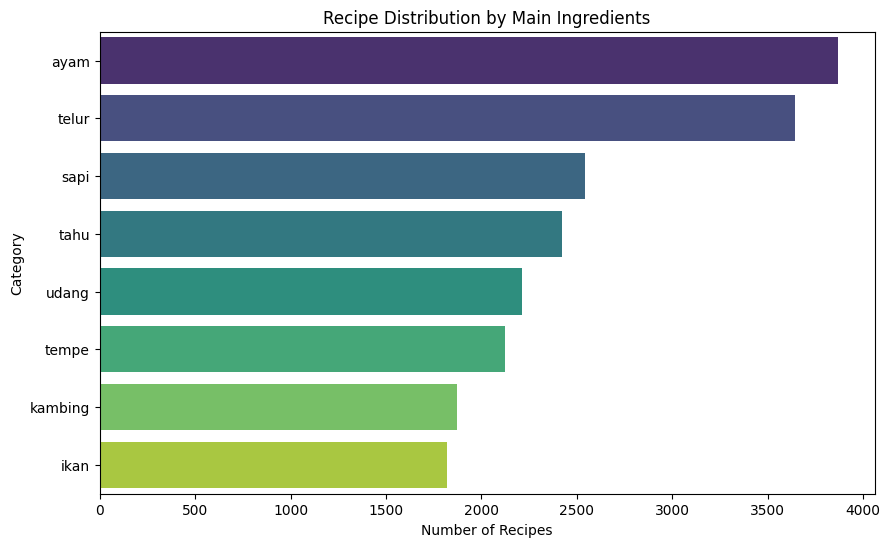

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Category', data=category_df, palette="viridis")
plt.xlabel("Number of Recipes")
plt.ylabel("Category")
plt.title("Recipe Distribution by Main Ingredients")
plt.show()


**Highlighting the Distribution of 'Loves'/Likes**
This highlights if a certain recipe is likes by a lot of people or not.

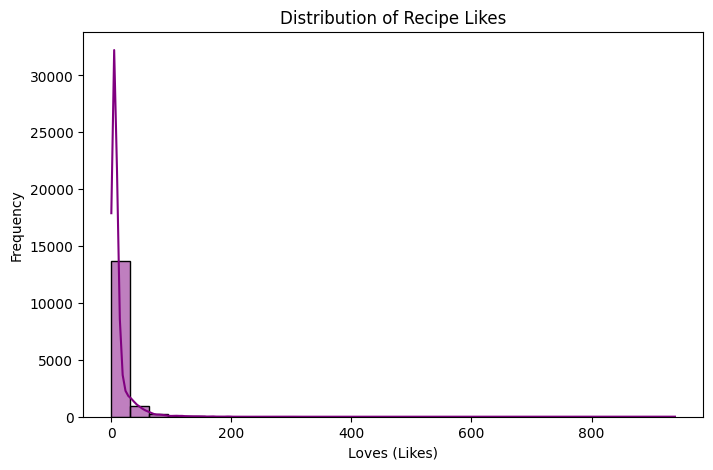

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(all_data_cleaned['Loves'], bins=30, kde=True, color='purple')
plt.xlabel("Loves (Likes)")
plt.ylabel("Frequency")
plt.title("Distribution of Recipe Likes")
plt.show()


**Top 10 Most Liked recipes (Bar Chart)**

This is showing the most popular recipes.

<ipython-input-28-2ac635be9fb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_loved['Loves'], y=top_loved['Title'], palette="magma")


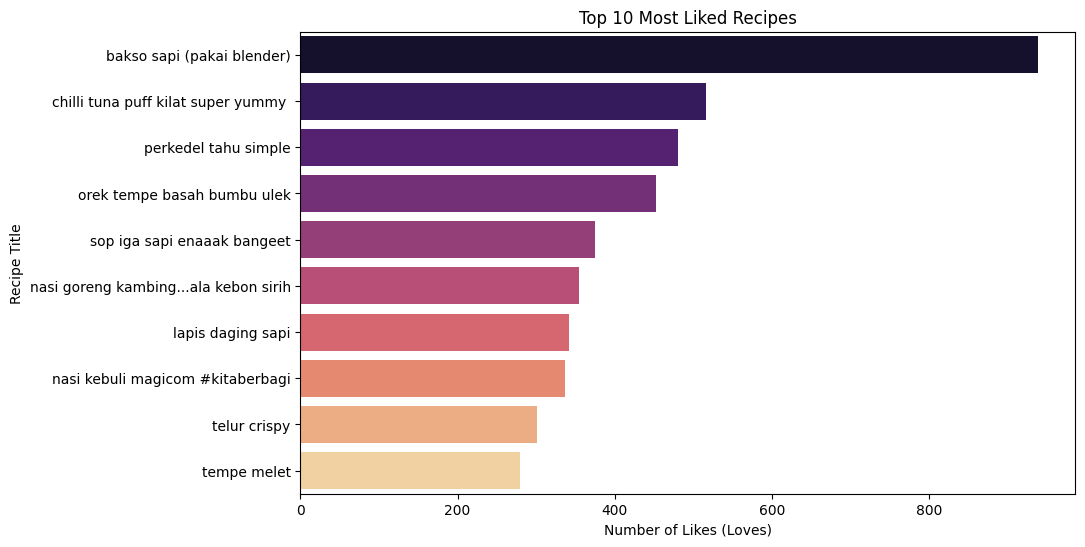

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_loved['Loves'], y=top_loved['Title'], palette="magma")
plt.xlabel("Number of Likes (Loves)")
plt.ylabel("Recipe Title")
plt.title("Top 10 Most Liked Recipes")
plt.show()


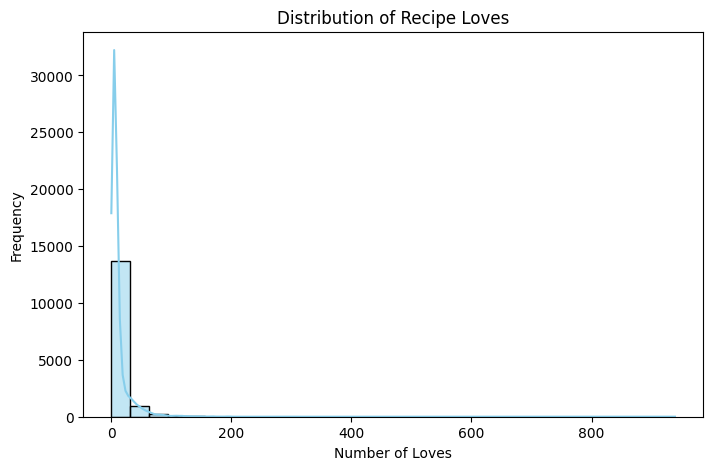

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for the 'Loves' column
plt.figure(figsize=(8, 5))
sns.histplot(all_data_cleaned['Loves'], bins=30, kde=True, color='skyblue')
plt.xlabel('Number of Loves')
plt.ylabel('Frequency')
plt.title('Distribution of Recipe Loves')
plt.show()


**Word Cloud of Common Ingriedients**

This is done so as to have a visual representation of the most frequently used ingredients.

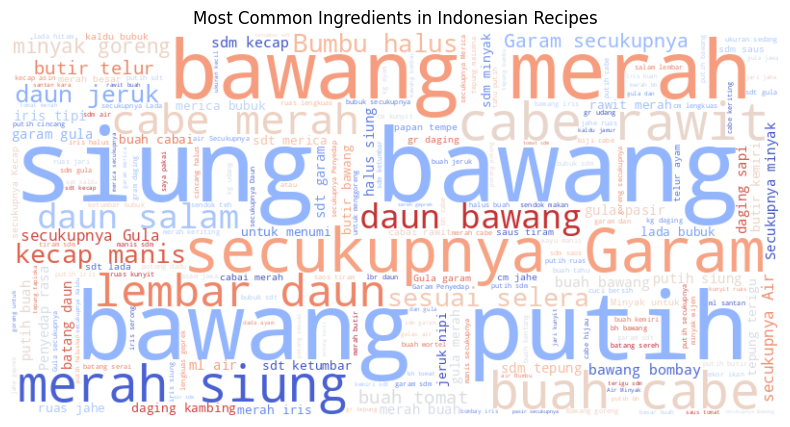

In [ ]:
from wordcloud import WordCloud

# Combine all ingredient texts
ingredients_text = " ".join(all_data_cleaned['Ingredients'].dropna().str.replace('--', ' '))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(ingredients_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Ingredients in Indonesian Recipes")
plt.show()


**Box Plot to show the Recipe Popularity Distribution**

This is used inorder to show if they are outliers in our data which could also highlight that some recipes are extremely popular when compared tto the others.

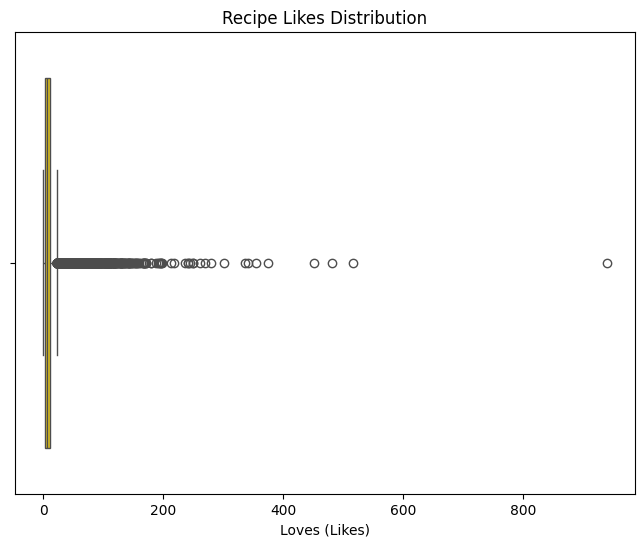

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=all_data_cleaned['Loves'], color="gold")
plt.xlabel("Loves (Likes)")
plt.title("Recipe Likes Distribution")
plt.show()


**Text Length analysis**

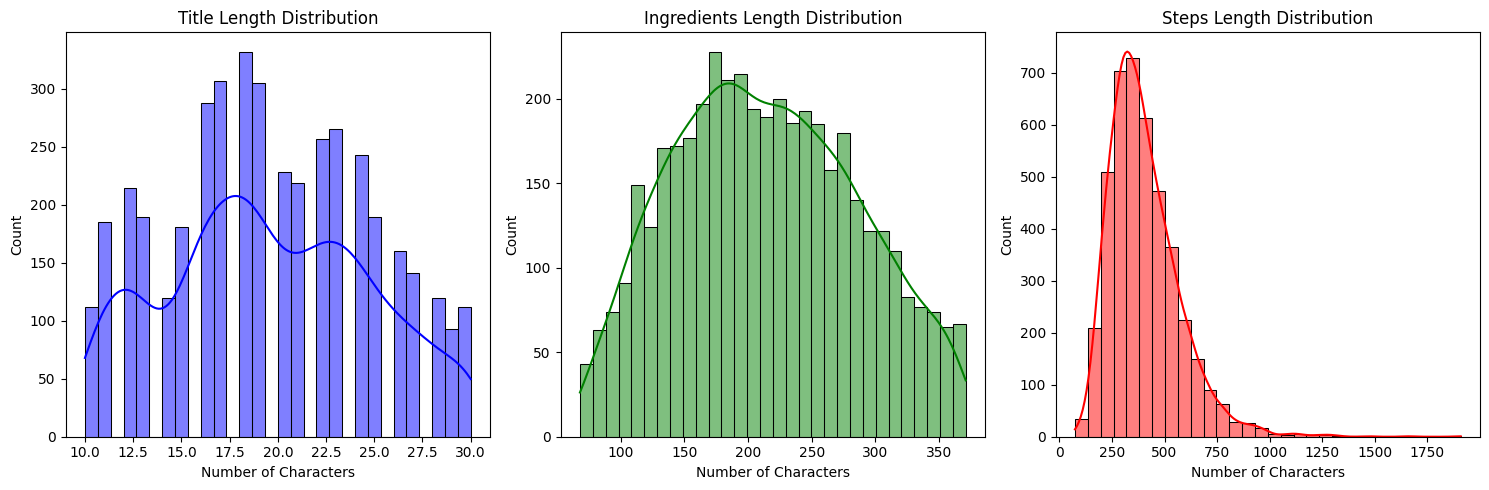

       Title_Length  Ingredients_Length  Steps_Length
count   4260.000000         4260.000000   4260.000000
mean      19.488732          214.173709    403.899531
std        5.245879           71.876896    167.164908
min       10.000000           68.000000     74.000000
25%       16.000000          159.000000    288.000000
50%       19.000000          210.000000    375.000000
75%       23.000000          268.000000    491.000000
max       30.000000          371.000000   1908.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data is copied to avoid warnings
all_data_cleaned = all_data_cleaned.copy()

# Create new text length features
all_data_cleaned["Title_Length"] = all_data_cleaned["Title"].fillna("").str.len()
all_data_cleaned["Ingredients_Length"] = all_data_cleaned["Ingredients"].fillna("").str.len()
all_data_cleaned["Steps_Length"] = all_data_cleaned["Steps"].fillna("").str.len()

# Plot histograms for text lengths
plt.figure(figsize=(15, 5))

# Title Length Distribution
plt.subplot(1, 3, 1)
sns.histplot(all_data_cleaned["Title_Length"], bins=30, kde=True, color="blue")
plt.title("Title Length Distribution")
plt.xlabel("Number of Characters")

# Ingredients Length Distribution
plt.subplot(1, 3, 2)
sns.histplot(all_data_cleaned["Ingredients_Length"], bins=30, kde=True, color="green")
plt.title("Ingredients Length Distribution")
plt.xlabel("Number of Characters")

# Steps Length Distribution
plt.subplot(1, 3, 3)
sns.histplot(all_data_cleaned["Steps_Length"], bins=30, kde=True, color="red")
plt.title("Steps Length Distribution")
plt.xlabel("Number of Characters")

plt.tight_layout()
plt.show()

# Display summary statistics
text_length_summary = all_data_cleaned[["Title_Length", "Ingredients_Length", "Steps_Length"]].describe()
print(text_length_summary)


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

# Ensure stopwords are downloaded
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))


### 1. Handling Duplicate Recipes ###
duplicate_count = all_data_cleaned.duplicated(subset=["Title", "Ingredients"]).sum()
print(f"Number of duplicate recipes: {duplicate_count}")

# Remove duplicates
all_data_cleaned = all_data_cleaned.drop_duplicates(subset=["Title", "Ingredients"], keep="first")

### 2. Removing Stopwords from Title ###
all_data_cleaned["Title_Cleaned"] = all_data_cleaned["Title"].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

### 3. Checking for Special Characters in Title ###
all_data_cleaned["Has_Special_Chars"] = all_data_cleaned["Title"].apply(lambda x: bool(re.search(r"[^a-zA-Z0-9\s]", x)))
special_char_count = all_data_cleaned["Has_Special_Chars"].sum()
print(f"Number of titles with special characters: {special_char_count}")

# For removing special characters from titles
all_data_cleaned["Title"] = all_data_cleaned["Title"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x))

### 4. Normalizing Text (Lowercasing) ###
all_data_cleaned["Title"] = all_data_cleaned["Title"].str.lower()
all_data_cleaned["Ingredients"] = all_data_cleaned["Ingredients"].str.lower()
all_data_cleaned["Steps"] = all_data_cleaned["Steps"].str.lower()

print("Data cleaning steps completed!")


Number of duplicate recipes: 1
Number of titles with special characters: 374
Data cleaning steps completed!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-72-f2a7385810ba>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_cleaned["Title_Cleaned"] = all_data_cleaned["Title"].apply(
<ipython-input-72-f2a7385810ba>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_cleaned["Has_Special_Chars"] = all_data_cleaned["Title"].apply(lambda x: bool(re.search(r"[^a-zA-Z0-9\s]", x)))
<ipython-input-72-f2a7385810ba>:30: SettingWith

**Pie Chart Showing Number of Recipes per Category**

This highlights the type of recipe which is most common such sapi, ayam, tofu.

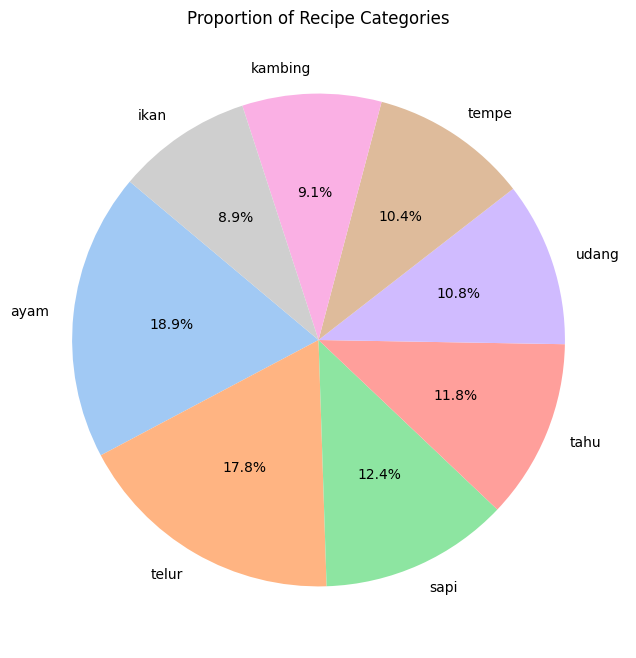

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(category_df['Count'], labels=category_df['Category'], autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Proportion of Recipe Categories")
plt.show()


**Pair Plot Showing each feature**

Dropping 'Num_Ingredients' from visualization because it is constant.


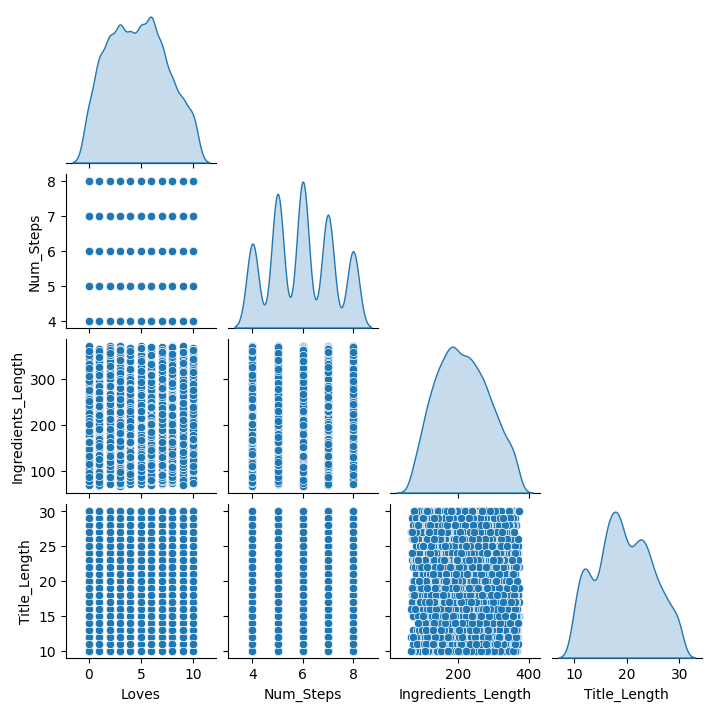

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensuring data is copied to avoid SettingWithCopyWarning
all_data_cleaned = all_data_cleaned.copy()

# Create numerical features safely
all_data_cleaned["Num_Steps"] = all_data_cleaned["Steps"].fillna("").str.count("--") + 1
all_data_cleaned["Ingredients_Length"] = all_data_cleaned["Ingredients"].fillna("").str.len()
all_data_cleaned["Title_Length"] = all_data_cleaned["Title"].fillna("").str.len()
all_data_cleaned["Num_Ingredients"] = all_data_cleaned["Ingredients"].fillna("").str.count(",") + 1

# Select numerical features for visualization
numeric_features = ["Loves", "Num_Ingredients", "Num_Steps", "Ingredients_Length", "Title_Length"]

# Drop rows with missing values in numeric_features
all_data_cleaned = all_data_cleaned.dropna(subset=numeric_features)

# Check if 'Num_Ingredients' has only one unique value
if all_data_cleaned["Num_Ingredients"].nunique() == 1:
    print("Dropping 'Num_Ingredients' from visualization because it is constant.")
    numeric_features.remove("Num_Ingredients")  # Remove from visualization only

# Create the pair plot with a smaller size
sns.pairplot(all_data_cleaned[numeric_features], diag_kind="kde", corner=True, height=1.8)

# Show the plot
plt.show()


**Correlation Heatmap**

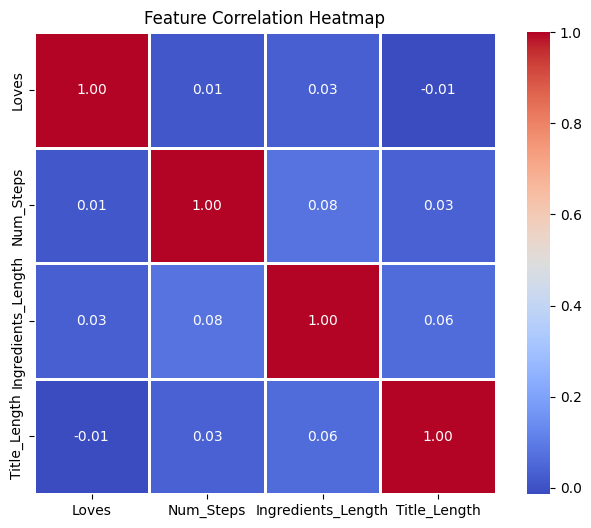

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure data is copied to avoid SettingWithCopyWarning
all_data_cleaned = all_data_cleaned.copy()

# Create numerical features safely
all_data_cleaned["Num_Steps"] = all_data_cleaned["Steps"].fillna("").str.count("--") + 1
all_data_cleaned["Ingredients_Length"] = all_data_cleaned["Ingredients"].fillna("").str.len()
all_data_cleaned["Title_Length"] = all_data_cleaned["Title"].fillna("").str.len()

# Ensure 'Num_Ingredients' is created before using it
all_data_cleaned["Num_Ingredients"] = all_data_cleaned["Ingredients"].fillna("").str.count(",") + 1

# Select only numerical features
numeric_features = ["Loves", "Num_Ingredients", "Num_Steps", "Ingredients_Length", "Title_Length"]

# Drop 'Num_Ingredients' if it has only one unique value (to avoid NaN in correlation)
if all_data_cleaned["Num_Ingredients"].nunique() == 1:
    numeric_features.remove("Num_Ingredients")

# Drop missing values in numeric columns before correlation
all_data_cleaned = all_data_cleaned.dropna(subset=numeric_features)

# Compute correlation matrix
corr_matrix = all_data_cleaned[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=1, square=True)

# Add a title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()


In [ ]:
# Display the first 5 rows of the dataset with new features
new_features = ["Num_Steps", "Num_Ingredients", "Ingredients_Length", "Title_Length"]
print("Newly Created Features:")
print(all_data_cleaned[new_features].head())


Newly Created Features:
   Num_Steps  Num_Ingredients  Ingredients_Length  Title_Length
0          7                1                 294            13
1          5                1                 357            13
2          6                6                 299            13
3          7                1                 365            20
4          5                1                 406            12


**Finding Out how many outliers are in our dataset**

In [ ]:
Q1 = all_data_cleaned['Loves'].quantile(0.25)  # 25th percentile
Q3 = all_data_cleaned['Loves'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = all_data_cleaned[(all_data_cleaned['Loves'] < lower_bound) | (all_data_cleaned['Loves'] > upper_bound)]
print(f"Total outliers found: {len(outliers)}")


Total outliers found: 1755


In [ ]:
all_data_cleaned = all_data_cleaned[(all_data_cleaned['Loves'] >= lower_bound) & (all_data_cleaned['Loves'] <= upper_bound)]


In [ ]:
median_loves = all_data_cleaned['Loves'].median()

# Replace outliers with median
all_data_cleaned.loc[all_data_cleaned['Loves'] > upper_bound, 'Loves'] = median_loves
all_data_cleaned.loc[all_data_cleaned['Loves'] < lower_bound, 'Loves'] = median_loves


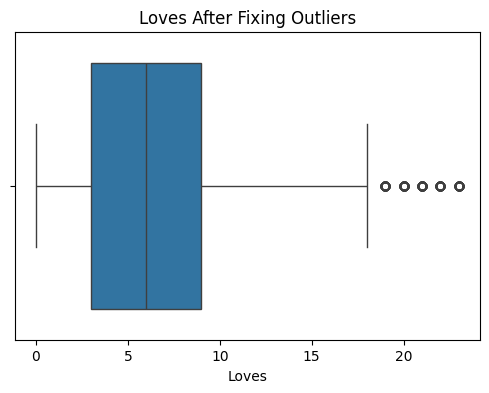

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=all_data_cleaned['Loves'])
plt.title("Loves After Fixing Outliers")
plt.show()